In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import signal
from IPython.display import HTML
from IPython import display
import time
from scipy import stats
import math

In [4]:


def _init(size, p=.5, shape="Random"):
    """ initializes the board for game of life
    size = ( int , int ) size of the board
    p = float  probability of one spot being alive
    shape = Random for board to be filled with probability p locations being alive
            1-8 for pre coded shapes
            
    returns board 
    """
    if shape == "Random":
        A = np.random.random(size)

        return np.where(A > p, 0, 1)
    A = np.zeros(size)
    if shape == 1:
        A[3, 3] = 1
        A[4, 3] = 1
        A[5, 3] = 1
    if shape == 2:
        A[3, 3] = 1
        A[4, 4] = 1
        A[3, 4] = 1
    if shape == 3:
        A[3, 3] = 1
        A[4, 3] = 1
        A[5, 3] = 1
        A[6, 3] = 1
    if shape == 4:
        A[3, 3] = 1
        A[4, 3] = 1
        A[5, 3] = 1
        A[4, 4] = 1
    if shape == 5:
        A[3, 3] = 1
        A[4, 3] = 1
        A[5, 3] = 1
        A[4, 4] = 1
    if shape == 6:
        A[3, 3] = 1
        A[4, 3] = 1
        A[5, 3] = 1
        A[5, 2] = 1
        A[4, 1] = 1
    if shape == 7:
        A[3, 4] = 1
        A[4, 3] = 1
        A[5, 3] = 1
        A[5, 2] = 1
        A[4, 1] = 1
    if shape == 8:
        A[3, 3] = 1
        A[4, 3] = 1
        A[5, 3] = 1
        A[4, 4] = 1
        A[5, 4] = 1
        A[6, 4] = 1

    return A

In [5]:
def game(A,bc = "Periodic"):
    """calculates the rules of the game of life
    
    A_NN calculates the sum of nearest neibors 
    remains_alive_condition = A “live” cell (value 1) remains alive only if this sum equals 2 or 3.
    random_life =  A dead cell will come to life only if the sum equals 3. 
    
    returns the new board A_new
    
    """

    A_NN = nearest_neibour_interp_fast(A,bc)

    remains_alive_condition = np.logical_and(A==1, np.logical_or(A_NN==2, A_NN==3))
    random_life = np.logical_and(A==0, A_NN==3)

    A_new = np.where(np.logical_or(remains_alive_condition,random_life),1,0)

    return A_new




In [6]:
def better_then_FuncAnimation(frames,board):
    plt.figure()
    
    for i in range(frames):
        density = np.mean(board)*100
        
        plt.title("Generation {}\n Density {}".format(i+1,density))
        plt.imshow(board)
        plt.show()
        board = game(board, bc='Periodic')
        time.sleep(0.1)
        display.clear_output(wait=True)
        display.display(plt.gcf())

        

In [7]:
def nearest_neibour_interp_fast(A, bc):

    k = [[True, True, True],
         [True, False, True],
         [True, True, True]]

    if bc == "Periodic":
        convolution = signal.convolve2d(A, k, mode='same', boundary='wrap')
    elif bc == "Symmetric":
        convolution = signal.convolve2d(A, k, mode='same', boundary='symm')
    else:
        convolution = signal.convolve2d(A, k, mode='same', boundary='fill')
    # print(convolution)
    return convolution

In [8]:
def update(i):
    global life
    image.set_data(life)
    biodensity = np.mean(life)*100
    life = game(life, bc='Periodic')
    biodensity = np.mean(life)*100
    ax.set_title("Life after {} interations. \n Enviroment is {:.2f}% full of life".format(i+1,biodensity))

Problem 14.6. The Game of Life

(a) LifeApp allows the user to determine the initial configuration interactively by clicking on a cell to change its value before hitting the Start button. Choose several initial configurations with a small number of live cells and determine the different types of patterns that emerge. Some suggested initial configurations are shown in Figure 14.2b. Does it matter whether you use fixed or periodic boundary conditions? Use a 16 × 16 lattice. 

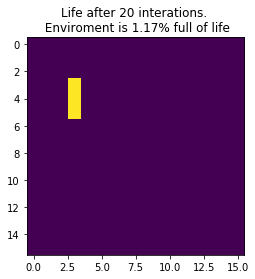

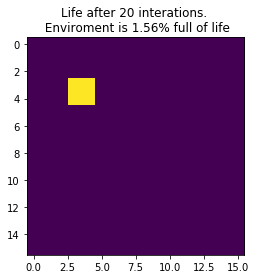

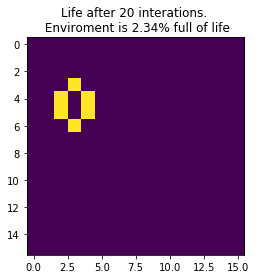

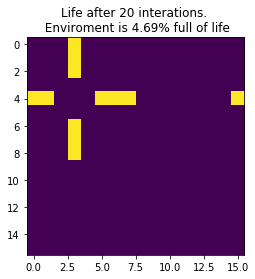

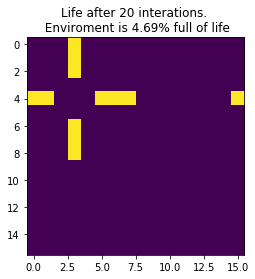

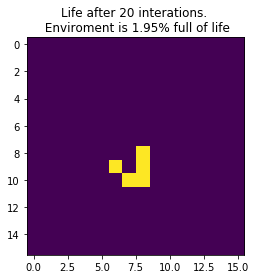

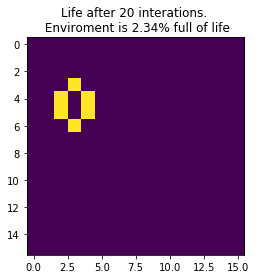

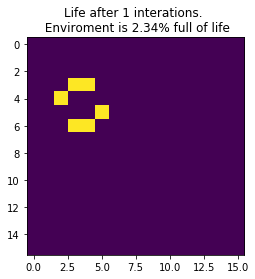

In [9]:
frames = 20
inital_prob = 0.2
size = (16,16)


for i in range(1,9):
    life = _init(size, inital_prob,i)
    fig, ax = plt.subplots(constrained_layout=False)
    image = ax.imshow(life)
    ani = animation.FuncAnimation(fig, update,repeat=False ,frames=frames, interval=500)
    HTML(ani.to_html5_video())

- All of the shapes dont seem to be effected by the the boundy conditions other then the shape shown below. 
        - The shape below seems to move slowly down and to the left  and would eventually cross hit the edge and wrap around
        - The shapes above may grow out  but thay seems to alays be symmetrical and circular to a point  
        

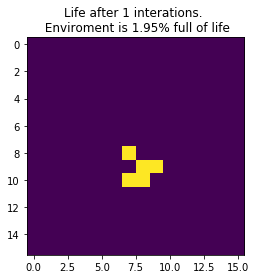

In [10]:
life = _init(size, inital_prob,6)
fig, ax = plt.subplots(constrained_layout=False)
image = ax.imshow(life)
ani = animation.FuncAnimation(fig, update,repeat=False ,frames=frames, interval=500)
HTML(ani.to_html5_video())

b) Modify LifeApp so that each cell is initially alive with a 50% probability. Use a 32 × 32 lattice.
- (See Cells below for the probabilities of 50% 20% and 70% respectively)
- What types of patterns typically result after a long time?
    - After long periods the game reaches something near to a steady-state where the bio-density does not change much
    - There tends to be a lot of groups that are lines (of length 3) or circular in shape
- What happens for 20% live cells?
    - starting at 20% the random placement of the living cells seems to lay a larger roll in how slowly the bio density decreases but it appears to decrease at a slower rate then 50% or 70%. THis makes sense because the small pods of living cells that initially have some room to live and expand if needed where the other two examples have substantially less room
- What happens for 70% live cells?
    - When starting at 70% there is a mass death that happens initially due to overcrowding then it seems reach a steady shape


50% probability


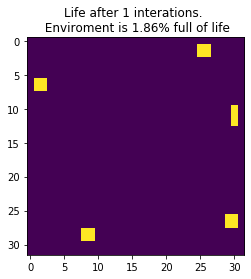

In [11]:
frames = 400
inital_prob = 0.5
size = (32,32)

life = _init(size, inital_prob,"Random")
fig, ax = plt.subplots(constrained_layout=False)
image = ax.imshow(life)
ani = animation.FuncAnimation(fig, update,repeat=False ,frames=frames, interval=500)
print("50% probability")
HTML(ani.to_html5_video())


20% probability


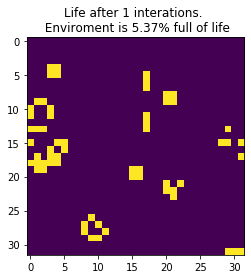

In [12]:
frames = 400
inital_prob = 0.2
size = (32,32)

life = _init(size, inital_prob,"Random")
fig, ax = plt.subplots(constrained_layout=False)
image = ax.imshow(life)
ani = animation.FuncAnimation(fig, update,repeat=False ,frames=frames, interval=500)
print("20% probability")
HTML(ani.to_html5_video())


70% probability


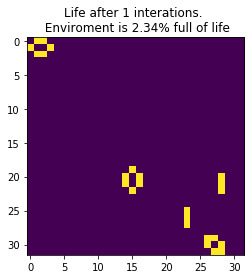

In [13]:
frames = 400
inital_prob = 0.7
size = (32,32)

life = _init(size, inital_prob,"Random")
fig, ax = plt.subplots(constrained_layout=False)
image = ax.imshow(life)
ani = animation.FuncAnimation(fig, update,repeat=False ,frames=frames, interval=500)
print("70% probability")
HTML(ani.to_html5_video())

In [14]:
def moded_update(i):
    """ new update code 
    life = global var of the current board
    datam = global var array of size frames of ints
    prob = global var of current starting bio density
    
    
    """
    global life
    global datam
    global prob
    datam[i] = np.mean(life)
    image.set_data(life)
    biodensity = np.mean(life)*100
    life = game(life, bc='Periodic')
    biodensity = np.mean(life)*100


    ax.set_title("Life after {} interations. \n Enviroment is {:.2f}% full of life \n With {}% probability".format(i+1,biodensity,prob*100))

0.0
0.26171875
0.5068359375
0.7509765625
1.0


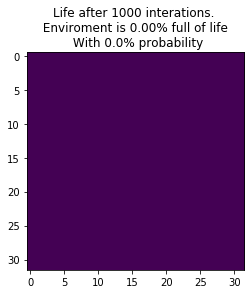

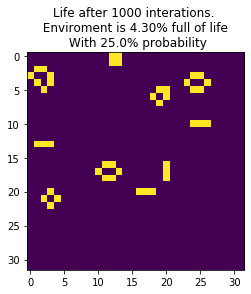

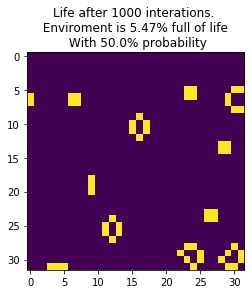

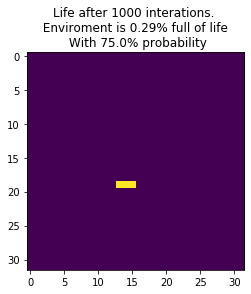

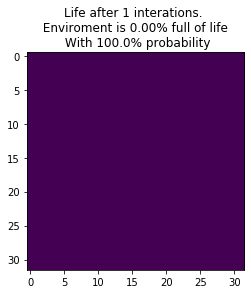

In [26]:
frames = 1000
inital_prob = np.linspace(0,1,5)
size = (32,32)

data={}
for prob in inital_prob:
    datam = np.zeros(frames)
    life = _init(size,prob, "Random")
    print(np.mean(life))
    fig, ax = plt.subplots(constrained_layout=False)
    image = ax.imshow(life)
    ani = animation.FuncAnimation(fig, moded_update,repeat=False ,frames=frames, interval=500)
    HTML(ani.to_html5_video())
    data[str(prob)]=datam

  

/home/kl3pt0/.local/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/kl3pt0/.local/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


Unable to calculate for 0.0 probability
Y=-6067.126058610106 X  +  912.2423198192356 For 0.25 probability
Y=-7247.733910734832 X  +  1004.5976904997751 For 0.5 probability
Y=-24015.312514674188 X  +  570.4436722235248 For 0.75 probability
Unable to calculate for 1.0 probability
Where Y is  p(t) and X is t 


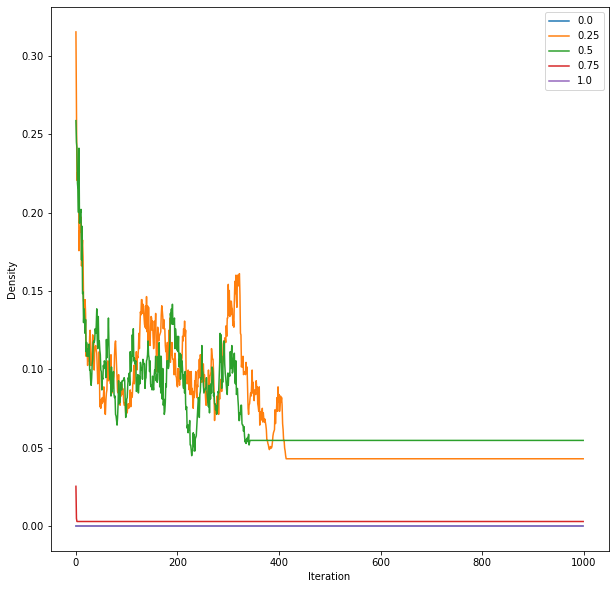

In [27]:
plt.figure(figsize=(10,10))
for key, data_list in data.items():
      
    
    plt.plot(range(frames), data_list, label=key)
    slope, intercept, _, _, _ =stats.linregress(data_list,range(frames))
    if math.isnan(slope):
        print("Unable to calculate for {} probability".format(key))
    else:
        print("Y={} X  +  {} For {} probability".format(slope,intercept,key))
print("Where Y is  p(t) and X is t ")
plt.legend()

plt.xlabel("Iteration")
plt.ylabel("Density")
plt.show()

/home/kl3pt0/.local/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/kl3pt0/.local/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


Unable to calculate for 0.0 probability
Y=0.9604202168365741 X  +  0.0024208440317968205 For 0.25 probability
Y=0.9502222297481102 X  +  0.0032654758893185254 For 0.5 probability
Y=0.0863113481071364 X  +  0.00267666798245534 For 0.75 probability
Unable to calculate for 1.0 probability
Where Y is p(t +1) and X is p(t)


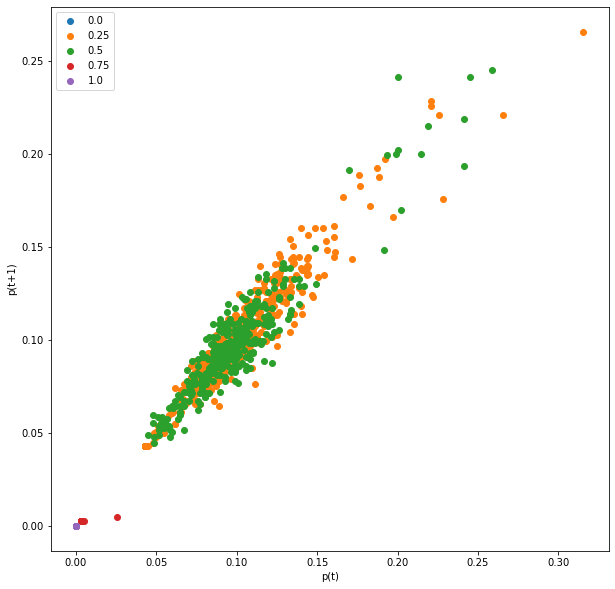

In [37]:
plt.figure(figsize=(10,10))
for key, data_list in data.items():
      
    
    plt.plot(data_list[:frames-1],data_list[1:],'o', label=key)
    
    slope, intercept, _, _, _ =stats.linregress(data_list[:frames-1],data_list[1:])
    if math.isnan(slope):
        print("Unable to calculate for {} probability".format(key))
    else:
        print("Y={} X  +  {} For {} probability".format(slope,intercept,key))
print("Where Y is p(t +1) and X is p(t)")
plt.legend()

plt.xlabel("p(t)")
plt.ylabel("p(t+1)")
plt.show()

#### Looking at the above graph and the linear regression done on the points we can see there is there seems to be a slope right around .9 and an intercept at .01

If p = 0.25, the steady-state density of live cells is 1.00000000
If p = 0.5, the steady-state density of live cells is 1.00000000
If p = 0.75, the steady-state density of live cells is 1.00000000


<ipython-input-46-70f45f4548cf>:7: RuntimeWarning: invalid value encountered in double_scalars
  if not np.isnan(data_list[frames-2]/data_list[frames-1]):


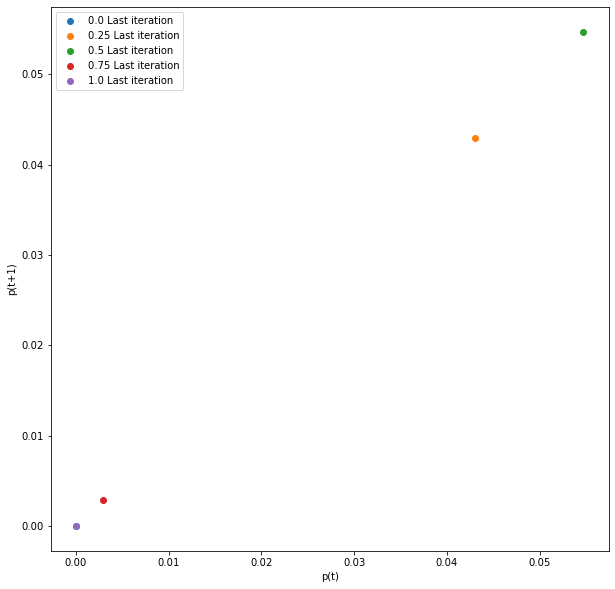

In [46]:
plt.figure(figsize=(10,10))
for key, data_list in data.items():
      
    
#     plt.plot(data_list[:frames-1],data_list[1:],'o', label=key)
    plt.plot(data_list[frames-1],data_list[frames-2],'o', label=key+" Last iteration")
    if not np.isnan(data_list[frames-2]/data_list[frames-1]):
        print("If p = {}, the steady-state density of live cells is {:.8f}".format(key,data_list[frames-2]/data_list[frames-2]))

plt.legend()

plt.xlabel("p(t)")
plt.ylabel("p(t+1)")
plt.show()